# 第七章 第一个机器学习项目

## 7.2 数据导入

### 程序清单7-1 类库检查

In [2]:
# 检查Python及相关类库版本  
 
# Python 版本检查  
import sys  
print('Python: {}'.format(sys.version))  
 
# matplotlib 版本检查  
import matplotlib  
print('matplotlib: {}'.format(matplotlib.__version__))  

# numpy 版本检查  
import numpy  
print('numpy: {}'.format(numpy.__version__))  

# pandas 版本检查  
import pandas  
print('pandas: {}'.format(pandas.__version__))  
 
# scikit-learn 版本检查  
import sklearn  
print('sklearn: {}'.format(sklearn.__version__))  

# scipy 版本检查  
import scipy  
print('scipy: {}'.format(scipy.__version__))  

Python: 3.10.9 (main, Mar  8 2023, 04:44:30) [Clang 14.0.6 ]
matplotlib: 3.7.1
numpy: 1.23.5
pandas: 1.5.3
sklearn: 1.2.1
scipy: 1.10.0


### 程序清单7-2 类库导入

In [22]:
# 类库导入    
import pandas  
import numpy as np  
from pandas.plotting import scatter_matrix    
import matplotlib.pyplot as plt    
from sklearn import model_selection    
from sklearn.metrics import classification_report    
from sklearn.metrics import confusion_matrix    
from sklearn.metrics import accuracy_score    
from sklearn.linear_model import LogisticRegression    
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis    
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis  
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.tree import DecisionTreeClassifier    
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC   
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.neural_network import MLPClassifier  

### 程序清单7-3 数据导入

In [23]:
# 数据导入  
datafile = 'data_banknote_authentication.csv'  
names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']  
dataset = pandas.read_csv(datafile, names=names)  

## 7.3 数据探索

### 程序清单7-4 查看前15行数据

In [24]:
# 查看前15行数据  
print(dataset.head(15))  

    variance  skewness  curtosis  entropy  class
0    3.62160    8.6661  -2.80730 -0.44699      0
1    4.54590    8.1674  -2.45860 -1.46210      0
2    3.86600   -2.6383   1.92420  0.10645      0
3    3.45660    9.5228  -4.01120 -3.59440      0
4    0.32924   -4.4552   4.57180 -0.98880      0
5    4.36840    9.6718  -3.96060 -3.16250      0
6    3.59120    3.0129   0.72888  0.56421      0
7    2.09220   -6.8100   8.46360 -0.60216      0
8    3.20320    5.7588  -0.75345 -0.61251      0
9    1.53560    9.1772  -2.27180 -0.73535      0
10   1.22470    8.7779  -2.21350 -0.80647      0
11   3.98990   -2.7066   2.39460  0.86291      0
12   1.89930    7.6625   0.15394 -3.11080      0
13  -1.57680   10.8430   2.54620 -2.93620      0
14   3.40400    8.7261  -2.99150 -0.57242      0


### 程序清单7-5 查看后若干行数据

In [25]:
# 查看后若干行数据    
print(dataset.tail())    

      variance  skewness  curtosis  entropy  class
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1


### 程序清单7-6 获取数据样本类型

In [26]:
# 获取数据样本类型  
print(dataset.dtypes)  

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object


### 程序清单7-7 获取数据维度

In [27]:
# 数据维度获取  
print(dataset.shape)  

(1372, 5)


### 程序清单7-8 获取数据统计信息

In [28]:
# 获取数据统计信息  
print(dataset.describe())  

          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


### 程序清单7-9 获取数据样本中各特征中值

In [29]:
# 获取数据样本中各项特征的中值  
print(dataset.median())

variance    0.49618
skewness    2.31965
curtosis    0.61663
entropy    -0.58665
class       0.00000
dtype: float64


### 程序清单7-10 获取数据样本中各特征均值

In [30]:
# 获取数据样本中各项特征的均值  
print(dataset.mean())  

variance    0.433735
skewness    1.922353
curtosis    1.397627
entropy    -1.191657
class       0.444606
dtype: float64


### 程序清单7-11 获取数据样本中各特征标准差

In [31]:
# 获取数据样本中各项特征的标准差  
print(dataset.std())  

variance    2.842763
skewness    5.869047
curtosis    4.310030
entropy     2.101013
class       0.497103
dtype: float64


### 程序清单7-12 数据分组

In [32]:
# 数据分组  
print(dataset.groupby('class').size())  

class
0    762
1    610
dtype: int64


## 7.4 数据可视化

### 程序清单7-13 数据预处理

In [33]:
# 数据预处理  
realdataset = dataset.copy()  
realdataset.pop('class')  

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

### 程序清单7-14 Matplotlib直方图绘制

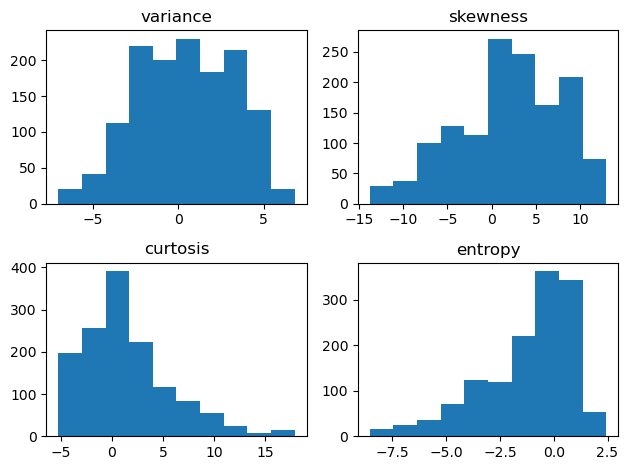

In [36]:
# Matplotlib数据可视化 直方图  
plt.figure()  
i = 1  
for key, values in realdataset.items():  
    plt.subplot(2,2,i)  
    plt.hist(values)  
    plt.title(key)  
    i = i+1  
  
plt.tight_layout()  
plt.show()  

### 程序清单7-15 Pandas直方图绘制

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

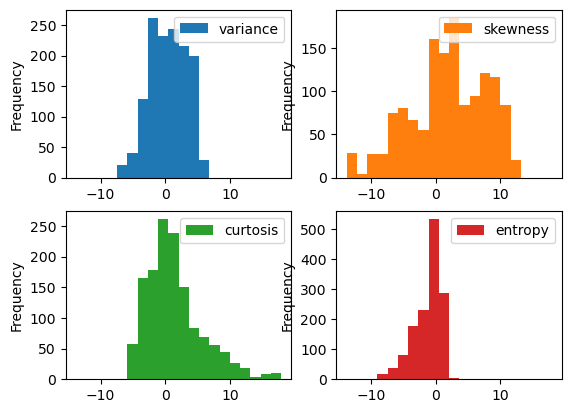

In [37]:
# Pandas数据可视化 直方图  
realdataset.plot.hist(subplots=True, layout=(2,2),bins=20, sharex=False, sharey=False) 

### 程序清单7-16 柱状图绘制

array([[<Axes: title={'center': 'variance'}>,
        <Axes: title={'center': 'skewness'}>],
       [<Axes: title={'center': 'curtosis'}>,
        <Axes: title={'center': 'entropy'}>]], dtype=object)

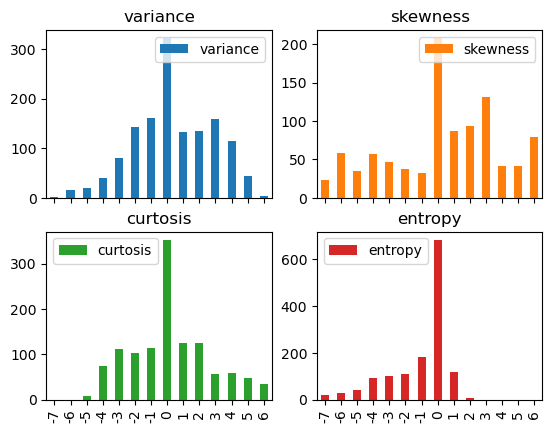

In [38]:
# 柱状图绘制  
 
# 将浮点数转为整数  
bardata = pandas.DataFrame(columns=['variance', 'skewness', 'curtosis', 'entropy'])    
 
bardata['variance'] = realdataset['variance'].astype('int').value_counts().sort_index()
bardata['skewness'] = realdataset['skewness'].astype('int').value_counts().sort_index()
bardata['curtosis'] = realdataset['curtosis'].astype('int').value_counts().sort_index()
bardata['entropy'] = realdataset['entropy'].astype('int').value_counts().sort_index()  
  
# 进行柱状图绘制  
bardata.plot(kind="bar",subplots=True, layout=(2, 2), sharex=True, sharey=False)  

### 程序清单7-17 箱线图绘制

<Axes: >

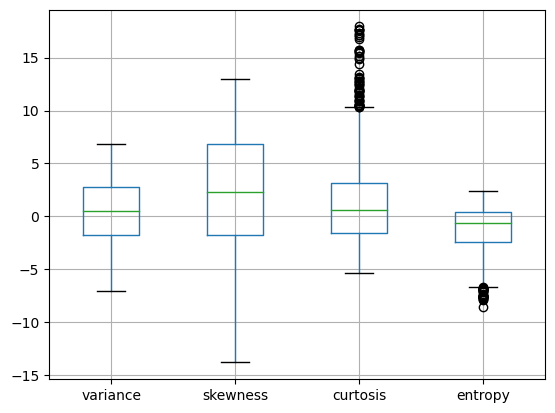

In [39]:
# 箱线图  
realdataset.boxplot()  

### 程序清单7-18 折线图绘制

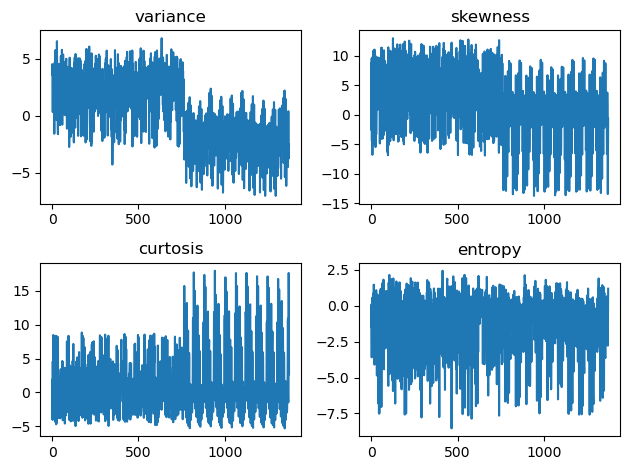

In [40]:
# 折线图  
plt.figure()  
i = 1  
x_data = range(realdataset.shape[0])  
for key, values in realdataset.items():  
    plt.subplot(2,2,i)  
    plt.plot(x_data, values)  
    plt.title(key)  
    i = i+1  
  
plt.tight_layout()  
plt.show()  

### 程序清单7-19 散点图绘制

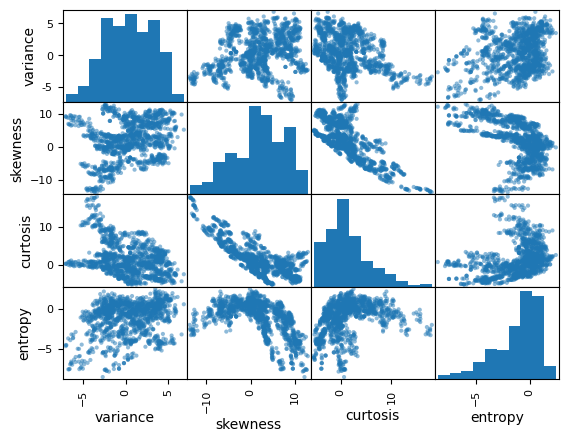

In [41]:
# 散点图  
scatter_matrix(realdataset)  
plt.show()  

## 7.5 算法评估

### 程序清单7-20 数据集拆分

In [42]:
# 拆分训练数据集和验证数据集  
array = dataset.values  
seed = 100
X = array[:,0:4]  
Y = array[:,4]  
validation_size = 0.20  
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed) 

### 程序清单7-21 模型搭建

In [21]:
# 模型搭建  
scoring = 'accuracy'  
 
models = []  
  
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))  
models.append(('LDA', LinearDiscriminantAnalysis()))  
models.append(('QDA', QuadraticDiscriminantAnalysis()))  
models.append(('KNN', KNeighborsClassifier()))  
models.append(('CART', DecisionTreeClassifier()))  
models.append(('NB', GaussianNB()))  
models.append(('SVM', SVC(gamma='auto')))  
models.append(('RFC', RandomForestClassifier(n_estimators=10)))  
models.append(('ADA', AdaBoostClassifier(n_estimators=100)))  
models.append(('MLPC', MLPClassifier(solver='lbfgs', alpha=1e5,hidden_layer_sizes=(5, 5), random_state=1)))  
  
# 轮流估计每种算法所训练出模型的精确度
results = []  
names = []  
for name, model in models:  
    kfold = model_selection.KFold(n_splits=10, random_state=seed)  
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')  
    results.append(cv_results)  
    names.append(name)  
    msg = "%s: %f" % (name, cv_results.mean())  
    print(msg)  

LR: 0.990867
LDA: 0.978098
QDA: 0.986305
KNN: 0.999091
CART: 0.984495
NB: 0.842244
SVM: 1.000000
RFC: 0.991785
ADA: 0.995438
MLPC: 0.546097


### 程序清单7-22 模型比较

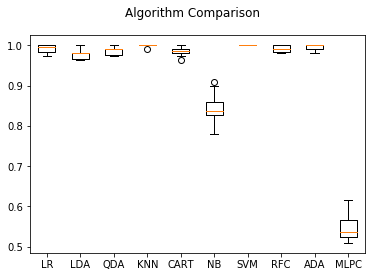

In [22]:
# 比较算法  
fig = plt.figure()  
fig.suptitle('Algorithm Comparison')  
ax = fig.add_subplot(111)  
plt.boxplot(results)  
ax.set_xticklabels(names)  
plt.show()  

### 程序清单7-23 预测实施与结果分析

In [23]:
# 使用选出的最优模型对验证数据集进行预测  
svm = SVC(gamma='auto')  
svm.fit(X_train, Y_train)  
predictions = svm.predict(X_validation)  
print(accuracy_score(Y_validation, predictions))  
print(confusion_matrix(Y_validation, predictions))  
print(classification_report(Y_validation, predictions))  

1.0
[[163   0]
 [  0 112]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       163
        1.0       1.00      1.00      1.00       112

avg / total       1.00      1.00      1.00       275

